In [1]:
import numpy as np
from scipy.special import kn
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
H_BAR = 197.3269804
G_A = 1.29
H_A = 3*G_A/np.sqrt(2.0)
F_PI = 184.80
C_1 = -0.57/1000.
C_2 = -0.25/1000.
C_3 = -0.79/1000.
C_4 = 1.33/1000.
B_3_PLUS_B_8 = 1.40/1000.
M_PI0 = 134.9768
M_PIC = 139.57039
M_PI = (2*M_PIC + M_PI0)/3
M_N = 939.56524
M_P = 938.27192
DELTA_M = 293.1
R_L = 0.8
a_L = R_L/2

In [3]:
def x_pi(r, m_pi):
    return m_pi*r/H_BAR

def y_ope(r, m_pi):
    x = x_pi(r, m_pi)
    y = G_A**2*m_pi**3*np.exp(-x)/(12*np.pi*F_PI**2*x)
    return y

def t_ope(r, m_pi):
    x = x_pi(r, m_pi)
    y = y_ope(r, m_pi)
    t = y*(1 + 3/x + 3/x**2)
    return t

def v_lo_sigma_tau(r):
    y_0 = y_ope(r, M_PI0)
    y_c = y_ope(r, M_PIC)
    v = (y_0 + 2*y_c)/3
    return v

def v_lo_t_tau(r):
    t_0 = t_ope(r, M_PI0)
    t_c = t_ope(r, M_PIC)
    v = (t_0 + 2*t_c)/3
    return v

def v_nlo_tau_deltaless(r):
    x = x_pi(r, M_PI)
    v = (H_BAR**4/(8*np.pi**3*r**4))*(M_PI/F_PI**4)*(x*(1 + 10*G_A**2 - G_A**4*(23 + 4*x**2))*kn(0, 2*x) + (1 + 2*G_A**2*(5 + 2*x**2) - G_A**4*(23 + 12*x**2))*kn(1, 2*x))
    return v

def v_nlo_sigma_deltaless(r):
    x = x_pi(r, M_PI)
    v = (H_BAR**4/(2*np.pi**3*r**4))*(G_A**4*M_PI/F_PI**4)*(3*x*kn(0, 2*x) + (3 + 2*x**2)*kn(1, 2*x))
    return v

def v_nlo_t_deltaless(r):
    x = x_pi(r, M_PI)
    v = -(H_BAR**4/(8*np.pi**3*r**4))*(G_A**4*M_PI/F_PI**4)*(12*x*kn(0, 2*x) + (15 + 4*x**2)*kn(1, 2*x))
    return v

def v_nlo_c_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)
    v = -(H_BAR**5/(6*np.pi**2*r**5*y))*(G_A**2*H_A**2/F_PI**4)*np.exp(-2*x)*(6 + 12*x + 10*x**2 + 4*x**3 + x**4)
    return v

def v_nlo_tau_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(12*x**2 + 5*mu**2 + 12*y**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)*np.arctan(mu/(2*y))
    f3 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(24*x**2 + 11*mu**2 + 12*y**2)
    f4 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)**2*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))
    i3, err = quad(f3, 0, np.inf, args=(r, x, y))
    i4, err = quad(f4, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**5/(216*np.pi**3*r**5))*(H_A**2/F_PI**4)*(i1 - 12*y*i2) - (H_BAR**5/(216*np.pi**3*r**5))*(G_A**2*H_A**2/F_PI**4)*(-i3 + 6*i4/y)
    return v

def v_nlo_sigma_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*y**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)*(mu**2 + 4*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**5/(72*np.pi**3*r**5))*(G_A**2*H_A**2/F_PI**4)*(2*i1 - 1/y*i2)
    return v

def v_nlo_sigma_tau_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)
    
    v = (H_BAR**5/(54*np.pi**2*r**5*y))*(G_A**2*H_A**2/F_PI**4)*np.exp(-2*x)*(1 + x)*(3 + 3*x + x**2)
    return v

def v_nlo_t_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*y**2)*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**5/(144*np.pi**3*r**5))*(G_A**2*H_A**2/F_PI**4)*(2*i1 - 1/y*i2)
    return v

def v_nlo_t_tau_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)
    
    v = -(H_BAR**5/(54*np.pi**2*r**5*y))*(G_A**2*H_A**2/F_PI**4)*np.exp(-2*x)*(1 + x)*(3 + 3*x + 2*x**2)
    return v

def v_nlo_c_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(4*y**2 + 2*(2*x**2 + mu**2 + 2*y**2)**2/(mu**2 + 4*y**2))
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)*(2*x**2 + mu**2 - 6*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**5/(108*np.pi**3*r**5))*(H_A**4/F_PI**4)*(i1 + 1/y*i2)
    return v

def v_nlo_tau_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(24*x**2 + 11*mu**2 + 24*y**2 + 6*(2*x**2 + mu**2 + 2*y**2)**2/(mu**2 + 4*y**2))
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)*(2*x**2 + mu**2 + 10*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**5/(1944*np.pi**3*r**5))*(H_A**4/F_PI**4)*(i1 - 3/y*i2)
    return v

def v_nlo_sigma_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)*(mu**2 + 12*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**5/(1296*np.pi**3*r**5))*(H_A**4/F_PI**4)*(-6*i1 + 1/y*i2)
    return v

def v_nlo_sigma_tau_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)*(-mu**2 + 4*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**5/(7776*np.pi**3*r**5))*(H_A**4/F_PI**4)*(-2*i1 + 1/y*i2)
    return v

def v_nlo_t_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)*(mu**2 + 12*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**5/(2592*np.pi**3*r**5))*(H_A**4/F_PI**4)*(-6*i1 + 1/y*i2)
    return v

def v_nlo_t_tau_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)*(-mu**2 + 4*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**5/(15552*np.pi**3*r**5))*(H_A**4/F_PI**4)*(-2*i1 + 1/y*i2)
    return v

def v_n2lo_c_deltaless(r):
    x = x_pi(r, M_PI)
    v = (3*H_BAR**6/(2*np.pi**2*r**6))*(G_A**2/F_PI**4)*np.exp(-2*x)*(2*C_1*x**2*(1 + x)**2 + C_3*(6 + 12*x + 10*x**2 + 4*x**3 + x**4))
    return v

def v_n2lo_sigma_tau_deltaless(r):
    x = x_pi(r, M_PI)
    v = (H_BAR**6/(3*np.pi**2*r**6))*(G_A**2/F_PI**4)*np.exp(-2*x)*C_4*(1 + x)*(3 + 3*x + 2*x**2)
    return v

def v_n2lo_t_tau_deltaless(r):
    x = x_pi(r, M_PI)
    v = -(H_BAR**6/(3*np.pi**2*r**6))*(G_A**2/F_PI**4)*np.exp(-2*x)*C_4*(1 + x)*(3 + 3*x + x**2)
    return v

def v_n2lo_c_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(-24*C_1*x**2 + C_2*(5*mu**2 + 12*x**2 + 12*y**2) - 6*C_3*(mu**2 + 2*x**2))
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 2*x**2 + 2*y**2)*(4*C_1*x**2 - 2*C_2*y**2 + C_3*(mu**2 + 2*x**2))*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**6/(18*np.pi**3*r**6))*(H_A**2*y/F_PI**4)*(i1 + 6/y*i2)
    return v

def v_n2lo_tau_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(12*x**2 + 5*mu**2 + 12*y**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)*np.arctan(mu/(2*y))
    f3 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(24*x**2 + 11*mu**2 + 12*y**2)
    f4 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)**2*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))
    i3, err = quad(f3, 0, np.inf, args=(r, x, y))
    i4, err = quad(f4, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**6/(54*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A*y/F_PI**4)*(i1 - 12*y*i2) - (H_BAR**6/(54*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A*G_A**2*y/F_PI**4)*(-i3 + 6/y*i4)
    return v

def v_n2lo_sigma_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)*(mu**2 + 4*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**6/(18*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A*G_A**2*y/F_PI**4)*(2*i1 - 1/y*i2)
    return v

def v_n2lo_sigma_tau_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)*(mu**2 + 4*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**6/(108*np.pi**3*r**6))*(C_4*H_A**2*y/F_PI**4)*(2*i1 - 1/y*i2)
    return v

def v_n2lo_t_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)*(mu**2 + 4*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**6/(36*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A*G_A**2*y/F_PI**4)*(2*i1 - 1/y*i2)
    return v

def v_n2lo_t_tau_delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)*(mu**2 + 4*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**6/(216*np.pi**3*r**6))*(C_4*H_A**2*y/F_PI**4)*(2*i1 - 1/y*i2)
    return v

def v_n2lo_c_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(6*(mu**2 + 2*x**2 + 2*y**2)**2/(mu**2 + 4*y**2) + 11*mu**2 + 24*x**2 + 12*y**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 2*x**2 + 10*y**2)*(mu**2 + 2*x**2 + 2*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(2*H_BAR**6/(81*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A**3*y/F_PI**4)*(i1 - 3/y*i2)
    return v

def v_n2lo_tau_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(6*(mu**2 + 2*x**2 + 2*y**2)**2/(mu**2 + 4*y**2) + 11*mu**2 + 24*x**2 + 12*y**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 2*x**2 + 10*y**2)*(mu**2 + 2*x**2 + 2*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**6/(243*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A**3*y/F_PI**4)*(i1 - 3/y*i2)
    return v

def v_n2lo_sigma_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)*(mu**2 + 12*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**6/(162*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A**3*y/F_PI**4)*(-6*i1 + 1/y*i2)
    return v

def v_n2lo_sigma_tau_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(mu**2 + 4*x**2)*(mu**2 + 12*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**6/(972*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A**3*y/F_PI**4)*(-6*i1 + 1/y*i2)
    return v

def v_n2lo_t_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)*(mu**2 + 12*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**6/(324*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A**3*y/F_PI**4)*(-6*i1 + 1/y*i2)
    return v

def v_n2lo_t_tau_2delta(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(3 + 3*np.sqrt(mu**2 + 4*x**2) + mu**2 + 4*x**2)*(mu**2 + 12*y**2)*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))

    v = (H_BAR**6/(1944*np.pi**3*r**6))*(B_3_PLUS_B_8*H_A**3*y/F_PI**4)*(-6*i1 + 1/y*i2)
    return v

def long_range_regulator(r, R_L, a_L):
    C_RL = 1 - 1/((r/R_L)**6 * np.exp((r-R_L)/a_L) + 1)
    return C_RL

In [31]:
# test box 1 (for python code)

def v_nlo_tau_delta_test(r):
    x = x_pi(r, M_PI)
    y = x_pi(r, DELTA_M)

    f1 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*mu**2#*(12*x**2 + 5*mu**2 + 12*y**2)
    f2 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)*np.arctan(mu/(2*y))
    f3 = lambda mu, r, x, y : mu**2/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(24*x**2 + 11*mu**2 + 12*y**2)
    f4 = lambda mu, r, x, y : mu/np.sqrt(mu**2 + 4*x**2)*np.exp(-np.sqrt(mu**2 + 4*x**2))*(2*x**2 + mu**2 + 2*y**2)**2*np.arctan(mu/(2*y))

    i1, err = quad(f1, 0, np.inf, args=(r, x, y))
    i2, err = quad(f2, 0, np.inf, args=(r, x, y))
    i3, err = quad(f3, 0, np.inf, args=(r, x, y))
    i4, err = quad(f4, 0, np.inf, args=(r, x, y))

    v = -(H_BAR**5/(216*np.pi**3*r**5))*(H_A**2/F_PI**4)*(i1 - 12*y*i2) - (H_BAR**5/(216*np.pi**3*r**5))*(G_A**2*H_A**2/F_PI**4)*(-i3 + 6/y*i4)
    return v

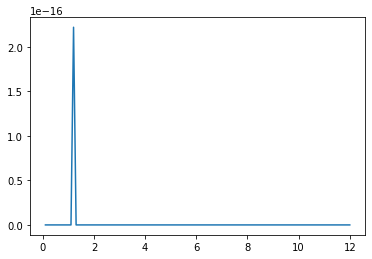

In [39]:
lo_pots = np.loadtxt('../lo.dat', unpack=True)
r = lo_pots[0]
plt.plot(r, lo_pots[1]-v_lo_sigma_tau(r)*long_range_regulator(r, R_L, a_L))
plt.show()

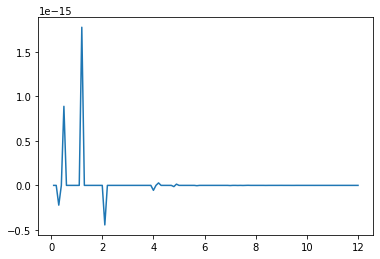

In [40]:
lo_pots = np.loadtxt('../lo.dat', unpack=True)
r = lo_pots[0]
plt.plot(r, lo_pots[2]-v_lo_t_tau(r)*long_range_regulator(r, R_L, a_L))
plt.show()

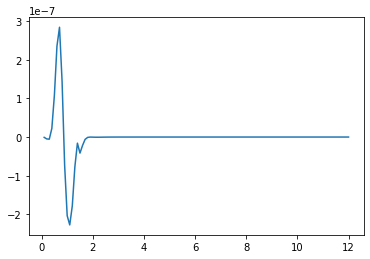

In [41]:
nlo_pots = np.loadtxt('../nlo.dat', unpack=True)
r = nlo_pots[0]
plt.plot(r, nlo_pots[1]-v_nlo_tau_deltaless(r)*long_range_regulator(r, R_L, a_L))
plt.show()

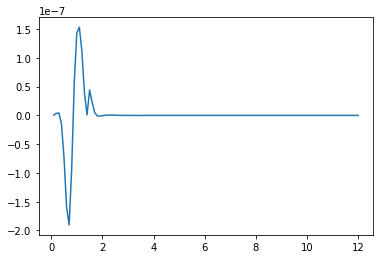

In [42]:
nlo_pots = np.loadtxt('../nlo.dat', unpack=True)
r = nlo_pots[0]
plt.plot(r, nlo_pots[2]-v_nlo_sigma_deltaless(r)*long_range_regulator(r, R_L, a_L))
plt.show()

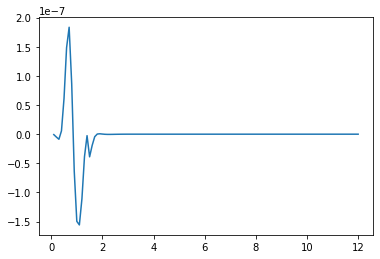

In [43]:
nlo_pots = np.loadtxt('../nlo.dat', unpack=True)
r = nlo_pots[0]
plt.plot(r, nlo_pots[3]-v_nlo_t_deltaless(r)*long_range_regulator(r, R_L, a_L))
plt.show()

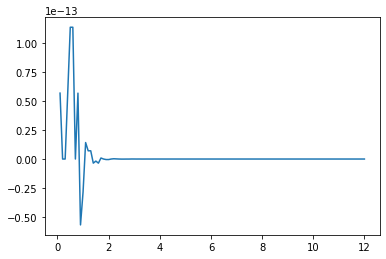

In [44]:
nlo_pots_1d = np.loadtxt('../nlo_d.dat', unpack=True)
r = nlo_pots_1d[0]
plt.plot(r, nlo_pots_1d[1]-v_nlo_c_delta(r)*long_range_regulator(r, R_L, a_L))
plt.show()

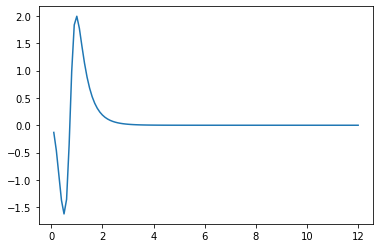

In [39]:
nlo_pots_1d = np.loadtxt('../nlo_d.dat', unpack=True)
r = nlo_pots_1d[0]
v = [v_nlo_tau_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_1d[2]-v)
plt.show()

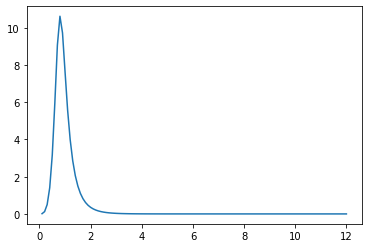

In [46]:
nlo_pots_1d = np.loadtxt('../nlo_d.dat', unpack=True)
r = nlo_pots_1d[0]
v = [v_nlo_sigma_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_1d[3]-v)
plt.show()

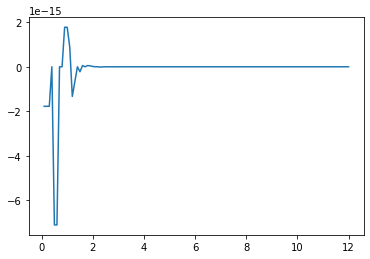

In [47]:
nlo_pots_1d = np.loadtxt('../nlo_d.dat', unpack=True)
r = nlo_pots_1d[0]
plt.plot(r, nlo_pots_1d[4]-v_nlo_sigma_tau_delta(r)*long_range_regulator(r, R_L, a_L))
plt.show()

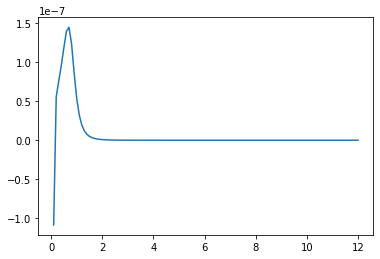

In [48]:
nlo_pots_1d = np.loadtxt('../nlo_d.dat', unpack=True)
r = nlo_pots_1d[0]
v = [v_nlo_t_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_1d[5]-v)
plt.show()

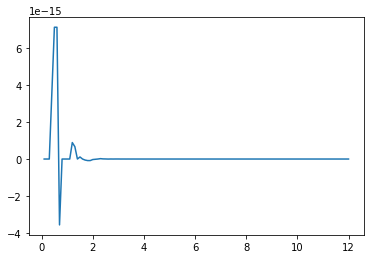

In [49]:
nlo_pots_1d = np.loadtxt('../nlo_d.dat', unpack=True)
r = nlo_pots_1d[0]
plt.plot(r, nlo_pots_1d[6]-v_nlo_t_tau_delta(r)*long_range_regulator(r, R_L, a_L))
plt.show()

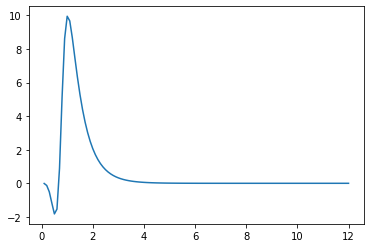

In [50]:
nlo_pots_2d = np.loadtxt('../nlo_2d.dat', unpack=True)
r = nlo_pots_2d[0]
v = [v_nlo_c_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_2d[1]-v)
plt.show()

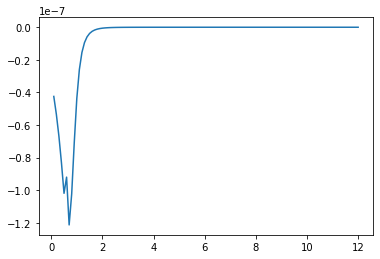

In [51]:
nlo_pots_2d = np.loadtxt('../nlo_2d.dat', unpack=True)
r = nlo_pots_2d[0]
v = [v_nlo_tau_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_2d[2]-v)
plt.show()

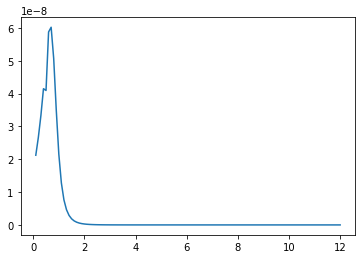

In [52]:
nlo_pots_2d = np.loadtxt('../nlo_2d.dat', unpack=True)
r = nlo_pots_2d[0]
v = [v_nlo_sigma_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_2d[3]-v)
plt.show()

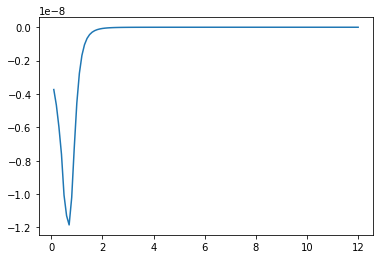

In [53]:
nlo_pots_2d = np.loadtxt('../nlo_2d.dat', unpack=True)
r = nlo_pots_2d[0]
v = [v_nlo_sigma_tau_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_2d[4]-v)
plt.show()

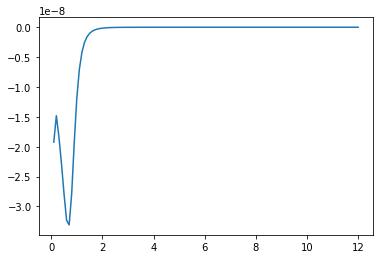

In [54]:
nlo_pots_2d = np.loadtxt('../nlo_2d.dat', unpack=True)
r = nlo_pots_2d[0]
v = [v_nlo_t_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_2d[5]-v)
plt.show()

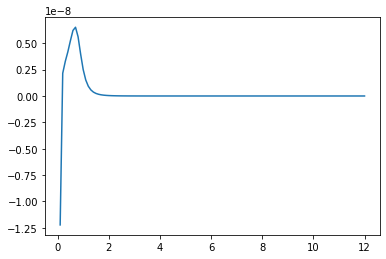

In [55]:
nlo_pots_2d = np.loadtxt('../nlo_2d.dat', unpack=True)
r = nlo_pots_2d[0]
v = [v_nlo_t_tau_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, nlo_pots_2d[6]-v)
plt.show()

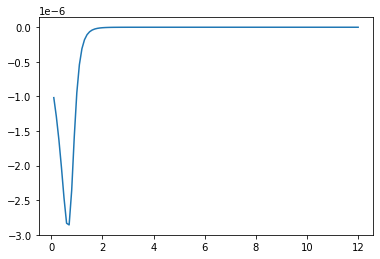

In [56]:
n2lo_pots = np.loadtxt('../n2lo.dat', unpack=True)
r = n2lo_pots[0]
plt.plot(r, n2lo_pots[1]-v_n2lo_c_deltaless(r)*long_range_regulator(r, R_L, a_L))
plt.show()

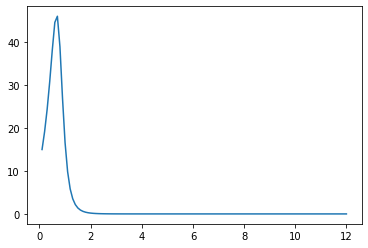

In [57]:
n2lo_pots = np.loadtxt('../n2lo.dat', unpack=True)
r = n2lo_pots[0]
plt.plot(r, n2lo_pots[2]-v_n2lo_sigma_tau_deltaless(r)*long_range_regulator(r, R_L, a_L))
plt.show()

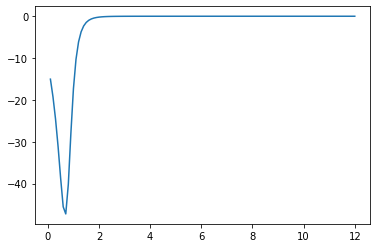

In [58]:
n2lo_pots = np.loadtxt('../n2lo.dat', unpack=True)
r = n2lo_pots[0]
plt.plot(r, n2lo_pots[3]-v_n2lo_t_tau_deltaless(r)*long_range_regulator(r, R_L, a_L))
plt.show()

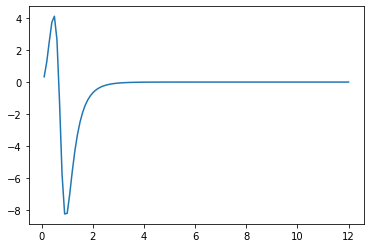

In [59]:
n2lo_pots_1d = np.loadtxt('../n2lo_d.dat', unpack=True)
r = n2lo_pots_1d[0]
v = [v_n2lo_c_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_1d[1]-v)
plt.show()

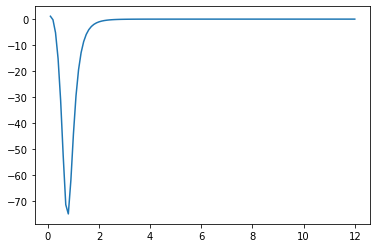

In [60]:
n2lo_pots_1d = np.loadtxt('../n2lo_d.dat', unpack=True)
r = n2lo_pots_1d[0]
v = [v_n2lo_tau_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_1d[2]-v)
plt.show()

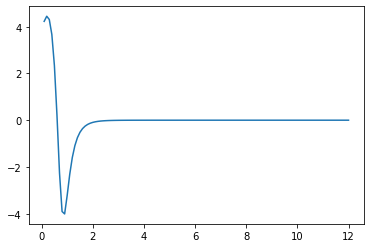

In [61]:
n2lo_pots_1d = np.loadtxt('../n2lo_d.dat', unpack=True)
r = n2lo_pots_1d[0]
v = [v_n2lo_sigma_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_1d[3]-v)
plt.show()

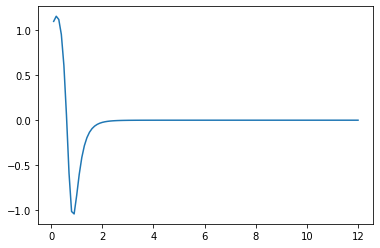

In [62]:
n2lo_pots_1d = np.loadtxt('../n2lo_d.dat', unpack=True)
r = n2lo_pots_1d[0]
v = [v_n2lo_sigma_tau_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_1d[4]-v)
plt.show()

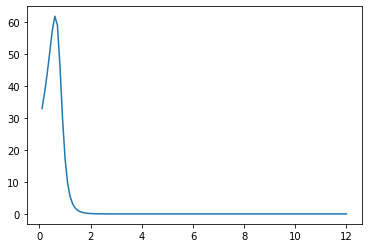

In [63]:
n2lo_pots_1d = np.loadtxt('../n2lo_d.dat', unpack=True)
r = n2lo_pots_1d[0]
v = [v_n2lo_t_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_1d[5]-v)
plt.show()

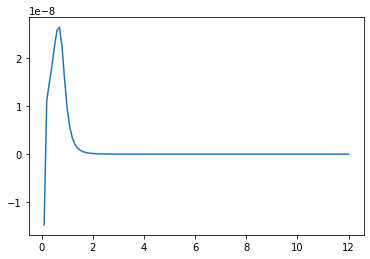

In [64]:
n2lo_pots_1d = np.loadtxt('../n2lo_d.dat', unpack=True)
r = n2lo_pots_1d[0]
v = [v_n2lo_t_tau_delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_1d[6]-v)
plt.show()

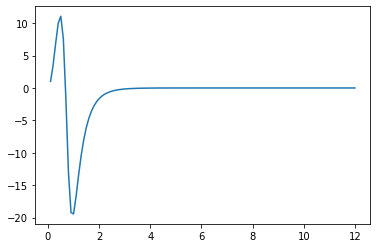

In [65]:
n2lo_pots_2d = np.loadtxt('../n2lo_2d.dat', unpack=True)
r = n2lo_pots_2d[0]
v = [v_n2lo_c_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_2d[1]-v)
plt.show()

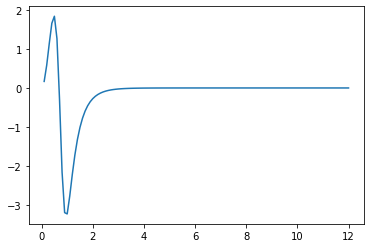

In [66]:
n2lo_pots_2d = np.loadtxt('../n2lo_2d.dat', unpack=True)
r = n2lo_pots_2d[0]
v = [v_n2lo_tau_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_2d[2]-v)
plt.show()

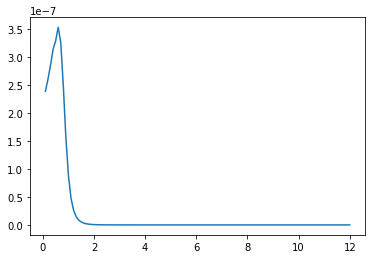

In [67]:
n2lo_pots_2d = np.loadtxt('../n2lo_2d.dat', unpack=True)
r = n2lo_pots_2d[0]
v = [v_n2lo_sigma_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_2d[3]-v)
plt.show()

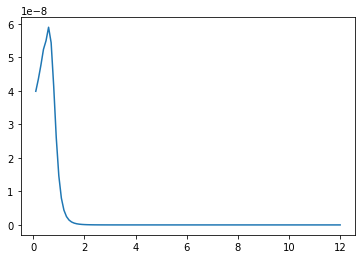

In [68]:
n2lo_pots_2d = np.loadtxt('../n2lo_2d.dat', unpack=True)
r = n2lo_pots_2d[0]
v = [v_n2lo_sigma_tau_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_2d[4]-v)
plt.show()

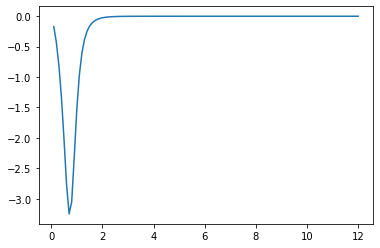

In [69]:
n2lo_pots_2d = np.loadtxt('../n2lo_2d.dat', unpack=True)
r = n2lo_pots_2d[0]
v = [v_n2lo_t_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_2d[5]-v)
plt.show()

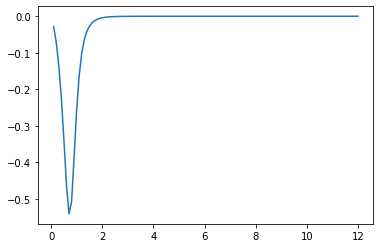

In [70]:
n2lo_pots_2d = np.loadtxt('../n2lo_2d.dat', unpack=True)
r = n2lo_pots_2d[0]
v = [v_n2lo_t_tau_2delta(ri) for ri in r ]*long_range_regulator(r, R_L, a_L)
plt.plot(r, n2lo_pots_2d[6]-v)
plt.show()